In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

# Life Game

In [2]:
# Core Code

import numpy as np
import matplotlib as mpl
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import time

# Game Configuration
Config = {
    "width": 20,
    "height": 20,
    "resolution": 60,
    "theme": ["white", "black"],
    "initialization": {
        "spawnCount": 70
    },
}

# DPI configuration
mpl.rcParams['figure.dpi'] = Config["resolution"]

# Stores an array of file names of saved images (per frame)
ImageStream = []

# Randomize every board
np.random.seed(int(time.time()))

# 1 is alive, 0 is dead, create initial canvas with spawnCount config
Canvas = np.concatenate(
    (
        np.ones(Config["initialization"]["spawnCount"]),
        np.zeros(Config["width"] * Config["height"] - Config["initialization"]["spawnCount"])
    ),
    axis=None
)
np.random.shuffle(Canvas)
Canvas = Canvas.reshape(Config["height"], Config["width"])

# Color map used by matplotlib
Cmap = ListedColormap(Config["theme"])

# Initialize the board
def initialize():
    Canvas = np.concatenate(
        (
            np.ones(Config["initialization"]["spawnCount"]),
            np.zeros(Config["width"] * Config["height"] - Config["initialization"]["spawnCount"])
        ),
        axis=None
    )
    np.random.shuffle(Canvas)
    Canvas = Canvas.reshape(Config["height"], Config["width"])
    Cmap = ListedColormap(["white", "black"])
    ImageStream = []

# Do once
initialize()

FPSTimer = 0

def fpsAdd(dt):
    global FPSTimer
    FPSTimer += dt
def fpsShow():
    global FPSTimer
    print("FPS:", 1/FPSTimer)
    FPSTimer = 0
# Decorators for performance analysis
def draw_performance(func):
    def inner():
        print(FPSTimer)
        beginTime = time.perf_counter()
        output = func()
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        fpsShow()
        return output
    return inner
def save_performance(func):
    def inner(arg):
        beginTime = time.perf_counter()
        output = func(arg)
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        fpsShow()
        return output
    return inner
def update_performance(func):
    def inner(arg):
        beginTime = time.perf_counter()
        output = func(arg)
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        return output
    return inner

# Simply draw the function
@draw_performance
def draw() -> bool:
    plt.grid(False)
    plt.axis('off')
    plt.imshow(Canvas, cmap = Cmap)
    plt.show()
    return True

# Save the image to file
@save_performance
def save(fileName) -> bool:
    plt.grid(False)
    plt.axis('off')
    plt.imshow(Canvas, cmap = Cmap)
    plt.savefig(fileName, transparent=True)
    ImageStream.append(fileName)
    return True

# Updates the Canvas
@update_performance
def update(canvas, frameCount = 1):
    updatedCanvas = canvas.copy()
    def computeLife(canvas, xId, yId):
        state = canvas[xId, yId] # Current status
        s = np.sum(
            canvas[
                max(0, xId-1):min(Config["height"]+1, xId+2),
                max(0, yId-1):min(yId+2, Config["width"] + 1)
            ]
        ) # 3x3 grid including center
        if state: # Previously alive
            return s - state == 2 or s - state == 3
        else: # Previously dead
            return s == 3
    # Basic iteration
    for xId in range(Config["height"]):
        for yId in range(Config["width"]):
            updatedCanvas[xId, yId] = computeLife(canvas, xId, yId)
    return updatedCanvas

0


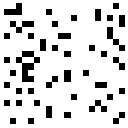

FPS: 18.95191943942346
0.004870312986895442


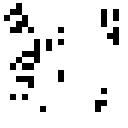

FPS: 18.406495887426093
0.004776041954755783


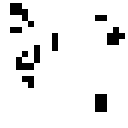

FPS: 17.48283567713256
0.0047458328772336245


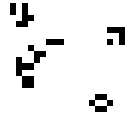

FPS: 17.538251139411074
0.004663021070882678


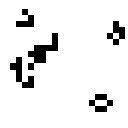

FPS: 18.501743889872095
0.00463229208253324


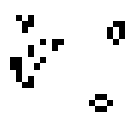

FPS: 18.713450282613376
0.004595312988385558


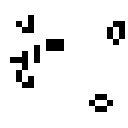

FPS: 18.34266368177082
0.0046307300217449665


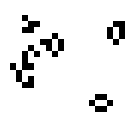

FPS: 18.864031339811536
0.0045921881683170795


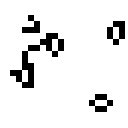

FPS: 18.880726683952634
0.0045770828146487474


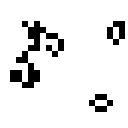

FPS: 18.262929265873467
0.0045989579521119595


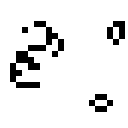

FPS: 18.307508918403574


In [3]:
# Play the game in real time with sequential frames
initialize()
draw()
frame = 0
while frame < 10:
    frame += 1
    Canvas = update(Canvas)
    draw()

0


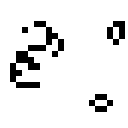

FPS: 10.71410643365113
FPS: 29.94011990373889
FPS: 41.53596482968829
FPS: 34.514371588395136
FPS: 29.080775064416606
FPS: 26.553812963681327
FPS: 23.773851746736863
FPS: 20.42205561903374
FPS: 17.583705496965706
FPS: 16.968625274716036
FPS: 15.822263298612258
FPS: 15.367130450910713
FPS: 13.524650718354776
FPS: 12.491298402208551
FPS: 11.513207181987429
FPS: 10.983856071384693
FPS: 10.167122071589407
FPS: 10.102073054787743
FPS: 9.93228465029917
FPS: 9.242055169240565
FPS: 8.670207062492766
FPS: 8.340609599970268
FPS: 7.971700474268562
FPS: 7.6489148219370895
FPS: 7.498242610666127
FPS: 7.250399367952131
FPS: 7.240091986785543
FPS: 7.032091265706608
FPS: 6.4161258491183535
FPS: 6.179435332078686
FPS: 6.0540895223779785
FPS: 5.865514703401149
FPS: 5.882352975980221
FPS: 6.039046233722248
FPS: 5.978607796561486
FPS: 5.811736075642788
FPS: 5.544918184703075
FPS: 5.531467389853086
FPS: 5.411331690513598
FPS: 5.290553323242585
FPS: 5.147425480860989
FPS: 5.029733064213514
FPS: 4.91309952925

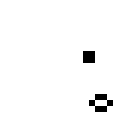

In [4]:
# Play the game but wait for results
initialize()
draw()
frame = 0
while frame < 55:
    frame += 1
    Canvas = update(Canvas)
    save("out"+str(frame)+".png")
    
#     pltCanvas.draw()
#     pilImage = PIL.Image.frombytes('RGB', pltCanvas.get_width_height(), pltCanvas.tostring_rgb())
#     ImageStream.append(pilImage)

In [8]:
Frames = []
print("Frames:", len(ImageStream))
for i in ImageStream:
    newFrame = Image.open(i)
    Frames.append(newFrame)
Frames[0].save('life.gif', format='GIF',
               append_images=Frames[1:],
               save_all=True,
               duration=3, loop=0, size=(500,500))

Frames: 55


Remember to **update this markdown block** for best view!
![](life.gif)

Hope you enjoy this mini-project!

## References

1. [Creating Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py)

2. [Workaround about global variables](https://careerkarma.com/blog/python-local-variable-referenced-before-assignment/#:~:text=The%20UnboundLocalError%3A%20local%20variable%20referenced%20before%20assignment%20error,is%20declared%20before%20you%20assign%20it%20a%20value.)

3. [PNG to GIF using PIL](https://pythonprogramming.altervista.org/png-to-gif/)

4. Official documentations.